In [17]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as px

import numpy as np
import pandas as pd
#import pandas_profiling
import csv
import os
import matplotlib.pyplot as plt
from scipy import genfromtxt
from scipy.optimize import curve_fit

In [3]:
init_notebook_mode(connected=True)

In [4]:
#folder = []

DSC_data=pd.read_csv(r'C:\Users\HOME\Desktop\Python\Recrystallization\DSCdata\DX56Disotherm.csv', header=[0], encoding='utf-8-sig', decimal=',', delimiter=';', engine='python')

DSC_data

,Time,DSC
0,24,0.008378
1,60,0.038300
2,92,0.115799
3,146,0.178636
4,250,0.305506
5,410,0.354578
6,660,0.395272
7,1092,0.549970
8,1798,0.727409
9,2976,0.779174


folder = []

DSC_data=pd.read_csv(r'C:\Users\HOME\Desktop\Python\Recrystallization\DSCdata\DX56D.csv', header=[0], encoding='utf-8-sig', decimal=',', delimiter=';', engine='python')

DSC_data.plot()
plt.show()


In [5]:
xdata = DSC_data['Time']
ydata = DSC_data['DSC']
ydata

0     0.008378
1     0.038300
2     0.115799
3     0.178636
4     0.305506
5     0.354578
6     0.395272
7     0.549970
8     0.727409
9     0.779174
10    0.896469
11    0.870736
12    0.929384
13    0.849192
14    0.973070
15    0.990724
Name: DSC, dtype: float64

In [28]:

fig = px.scatter(DSC_data, x="Time", y="DSC", 
           log_x=True)
fig.show()

In [16]:
trace_alpha = go.Scatter(
    x = DSC_data['Time'],
    y = DSC_data['DSC'],
    
    name = u'DSC',
    
)


layout = go.Layout(
    title='Зависимость сигнала DSC от времени',
    yaxis = {'title': 'DSC'},
    xaxis = {'title': 'time'}
)   

fig = go.Figure(data = [trace_alpha], layout = layout)
iplot(fig)






In [139]:
def func(t, taw0, E, n):
    return (1.0-np.exp(-((t/(taw0*np.exp(E/8.31/933.0)))**n)))


In [140]:
func(10000, 9**(-20), 400000, 0.6)

0.9223089928677706

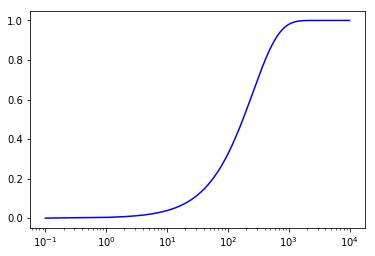

In [141]:
plt.plot(np.arange(0.1, 10000, 1), func(np.arange(0.1, 10000, 1), 10**(-20), 400000, 1.0), 'b-')
plt.xscale('log')

In [142]:
popt, pcov = curve_fit(func, xdata, ydata, p0=[9**(-20), 400000, 1.0])

popt


array([4.37908004e-20, 4.02010798e+05, 7.13747293e-01])

In [143]:
pcov

array([[ 1.67797805e-27, -2.96610028e-04, -4.68308617e-15],
       [-2.96610028e-04,  5.24306671e+19,  8.27811966e+08],
       [-4.68308617e-15,  8.27811966e+08,  1.56582083e-02]])

In [144]:
func(10, 7, 500, 0.6)

0.6962703391759526

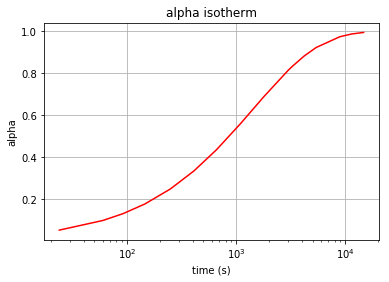

In [146]:
plt.figure()
#plt.subplot(222)
plt.plot(xdata, func(xdata, *popt), 'r-')
plt.xscale('log')
plt.title('alpha isotherm')
plt.grid(True)
plt.xlabel('time (s)')
plt.ylabel('alpha')

plt.show()

In [74]:
DSCdataNI=pd.read_csv(r'C:\Users\HOME\Desktop\Python\Recrystallization\DSCdata\DX56DNI4.csv', header=[0], encoding='utf-8-sig', decimal=',', delimiter=';', engine='python')

DSCdataNI

,Time,dAlpha_dt
0,18.0930,4.534000e-05
1,36.1890,-2.667000e-05
2,54.2310,-6.080000e-06
3,72.3324,2.338000e-05
4,90.3972,-5.980000e-06
5,108.4872,2.349000e-05
6,126.5310,5.480000e-06
7,144.5430,-2.230000e-06
8,162.5922,2.670000e-06
9,180.6090,2.061000e-05


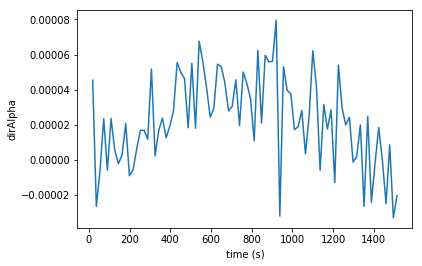

In [123]:
xdataNI = DSCdataNI['Time']
ydataNI = DSCdataNI['dAlpha_dt']
#ydataNI = DSCdataNI['dAlpha_dt'].rolling(3).mean()
plt.xlabel('time (s)')
plt.ylabel('dirAlpha')
xdataNI, ydataNI
plt.plot(xdataNI, ydataNI)

In [125]:
def dirAlpha(t, k0, E, n):
    return k0*n*(t**(n-1))*np.exp(E/(8.31*(0.17*t+773)))


In [128]:
dirAlpha(50, 9**(-20), 200000, 2.0)

0.00019492051682259195

Text(0,0.5,'dirAlpha')

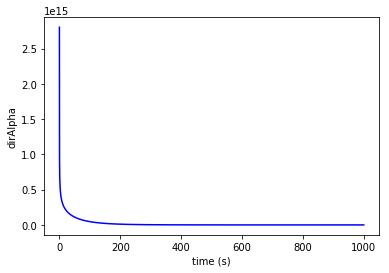

In [152]:
plt.plot(np.arange(0.01, 1000, 0.01), dirAlpha(np.arange(0.01, 1000, 0.01), 4**(-20), 400000, 0.7), 'b-')
plt.xlabel('time (s)')
plt.ylabel('dirAlpha')
#plt.xscale('log')

In [134]:
param, param_cov = curve_fit(dirAlpha, xdataNI, ydataNI, p0=[9.0**(-20), 200000.0, 2.0])

param
param_cov

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [80]:
np.exp(10**(-20))

1.0

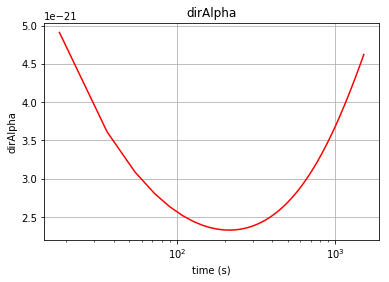

In [115]:
plt.plot(xdataNI, dirAlpha(xdataNI, *param), 'r-')
plt.xscale('log')
plt.title('dirAlpha')
plt.grid(True)
plt.xlabel('time (s)')
plt.ylabel('dirAlpha')

plt.show()